In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, normalize

from sklearn.cluster import KMeans 

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score



In [52]:
df = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Week9\\College.csv")


In [53]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [32]:
df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [54]:
columns = df.columns

columns = list(map(lambda x:x.lower(),columns))
columns = list(map(lambda x:x.replace(" ",""),columns))
columns = list(map(lambda x:x.replace(":",""),columns))
columns = list(map(lambda x:x.replace(".","_"),columns))
print(columns)

df.columns = columns

['unnamed0', 'private', 'apps', 'accept', 'enroll', 'top10perc', 'top25perc', 'f_undergrad', 'p_undergrad', 'outstate', 'room_board', 'books', 'personal', 'phd', 'terminal', 's_f_ratio', 'perc_alumni', 'expend', 'grad_rate']


In [55]:
df.head()

,unnamed0,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [56]:
df["private"].unique()

array(['Yes', 'No'], dtype=object)

In [57]:
#Private - 1 in private column
#Public - 0 in private column

df["private"][df["private"] == "Yes"] = "1"
df["private"][df["private"] == "No"] = "0"

df.head()


<ipython-input-57-c5f1ca71f095>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["private"][df["private"] == "Yes"] = "1"
<ipython-input-57-c5f1ca71f095>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["private"][df["private"] == "No"] = "0"


,unnamed0,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [59]:
df.isnull().sum()

private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64

In [58]:
df = df.drop('unnamed0',axis = 1)
df.columns

Index(['private', 'apps', 'accept', 'enroll', 'top10perc', 'top25perc',
       'f_undergrad', 'p_undergrad', 'outstate', 'room_board', 'books',
       'personal', 'phd', 'terminal', 's_f_ratio', 'perc_alumni', 'expend',
       'grad_rate'],
      dtype='object')

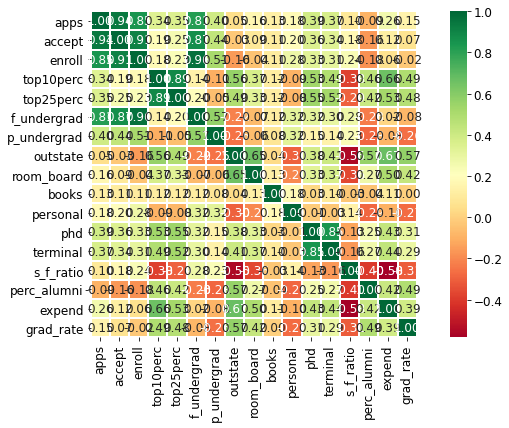

In [60]:
f, ax = plt.subplots(figsize=(12,6))

sns.heatmap(df.corr(),square=True, cmap="RdYlGn",linewidth=1,annot=True,fmt='.2f')

In [12]:
#sns.pairplot(df)
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [61]:
#Standardizing
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df.iloc[:,1:])

#Normalizing
normalized_df = normalize(scaled_df)

normalized_df = pd.DataFrame(normalized_df)

#Reducing the dimensions of data

#According to the heatmap,only 7 columns are well correlated,therefore I chose 7 components in PCA
pca = PCA(n_components = 7)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2','P3','P4','P5','P6','P7']

X_principal.head()

,P1,P2,P3,P4,P5,P6,P7
0,0.141298,0.009648,0.075344,-0.049481,-0.092969,0.001976,0.055927
1,-0.259439,0.177130,-0.056229,0.509050,0.003259,0.188327,-0.062502
2,-0.158014,-0.007635,0.047098,-0.027820,0.066590,0.061840,-0.013786
3,-0.162134,-0.173024,-0.086783,-0.117779,-0.042220,0.055499,-0.045895
4,0.155888,0.051547,-0.199559,-0.125403,-0.208242,0.185606,-0.015668


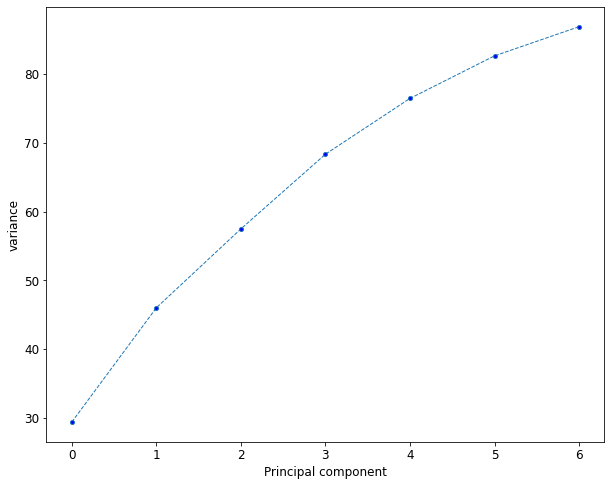

In [62]:
plt.figure(figsize=[10,8])
plt.rcParams['font.size'] = 12

pca.explained_variance_ratio_
variance_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5)*100)


plt.plot(variance_sum, linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=4)
plt.xlabel('Principal component')
plt.ylabel('variance')

X = X_principal

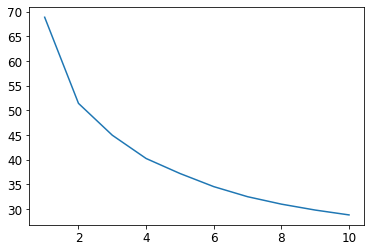

In [63]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= None)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)

In [64]:
#It actually doesn't depend on elbow method as number of clusters must be 2(private and public)
kmeans = KMeans( n_clusters = 2, init = 'k-means++')
kmeans.fit(X)
print(kmeans.cluster_centers_)

clusters = kmeans.fit_predict(X)
df['label']=clusters

[[ 0.21079004 -0.00429113  0.01242198  0.00088348  0.000474    0.00532144
   0.00081904]
 [-0.1060066   0.00215801 -0.00624703 -0.0004443  -0.00023837 -0.00267616
  -0.0004119 ]]


In [65]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,label
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [66]:
df["private"] = df["private"].astype(int)
df["private"].unique()

array([1, 0])

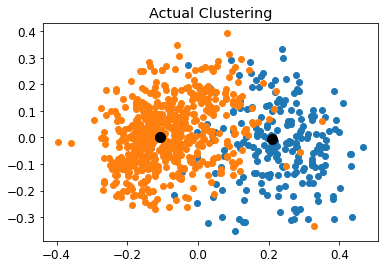

In [67]:
plt.scatter(X_principal['P1'][df.private == 0 ], X_principal['P2'][df.private == 0 ])
plt.scatter(X_principal['P1'][df.private == 1 ], X_principal['P2'][df.private == 1 ]) 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,color = "k")
plt.title("Actual Clustering")
plt.show()

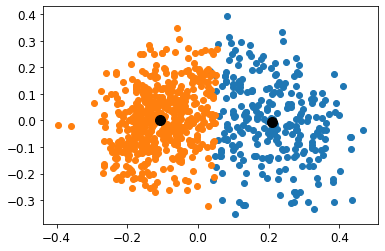

In [70]:
plt.scatter(X_principal['P1'][df.label == 0 ], X_principal['P2'][df.label == 0 ])
plt.scatter(X_principal['P1'][df.label == 1 ], X_principal['P2'][df.label == 1 ]) 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,color = "k")
plt.show()


In [72]:
X_principal

,P1,P2,P3,P4,P5,P6,P7
0,0.141298,0.009648,0.075344,-0.049481,-0.092969,0.001976,0.055927
1,-0.259439,0.177130,-0.056229,0.509050,0.003259,0.188327,-0.062502
2,-0.158014,-0.007635,0.047098,-0.027820,0.066590,0.061840,-0.013786
3,-0.162134,-0.173024,-0.086783,-0.117779,-0.042220,0.055499,-0.045895
4,0.155888,0.051547,-0.199559,-0.125403,-0.208242,0.185606,-0.015668
...,...,...,...,...,...,...,...
772,0.183602,0.242924,0.037593,0.031317,0.013527,0.063333,-0.115877
773,-0.103661,0.065473,0.015244,0.042515,0.068144,-0.044149,0.008191
774,0.025692,-0.100930,0.012394,-0.052713,-0.062001,0.025809,-0.107811
775,-0.216581,-0.223909,-0.072764,0.067179,0.034660,0.063540,0.070467


In [71]:
print('Accuracy: {}'.format(accuracy_score(df.private, df.label)))

Accuracy: 0.9034749034749034
